In [151]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #to plot charts
import seaborn as sns #used for data visualization
from sklearn.preprocessing import LabelEncoder, MinMaxScaler


# A. Data Wrangling & Feature Engineering

In [152]:
# Load data using read_csv()
data = pd.read_csv('MedicalCentre.csv')
# the shape of a Dataframe
data.shape

(110527, 14)

In [153]:
# Show initial 5 records
data.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.590000e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.260000e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.680000e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.840000e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,1,1,0,0,0,No


## 1. Prepare the data for downstream processes, e.g., deal with missing values, duplicates 	

### Missing values

In [154]:
# check for missing values and duplicates
print("Missing values:\n", data.isna().sum())
print("Duplicates:\n", data.duplicated().sum())

Missing values:
 PatientID         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               3
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
No-show           0
dtype: int64
Duplicates:
 0


There are 3 missing value in the age columns.

In [155]:
# Drop missing value rows using dropna() function
# deal with missing values
data = data.dropna()
data.shape

(110524, 14)

We can see that there is 110524 rows now, we drop 3 null values which is in the age columns.

### Duplicates 	

In [156]:
# drop duplicates
data = data.drop_duplicates()
data.shape

(110524, 14)

In [157]:
# delete the duplicate rows with same appointmentID. 
data = data.drop_duplicates(subset='AppointmentID', keep='first')
data.shape
# 这块也行，做个备注

(110524, 14)

In [158]:
##drop the patientID and AppointmentID
#data=data.drop(['PatientID','AppointmentID'],axis=1,inplace=False)
#print(data.shape)
#data.head()
# 这块我没有看懂为什么要把这两个都drop？

## 2. Determine the frequency of distinct values in each feature set

In [159]:
# Check the descriptive statistics
data.describe()

,PatientID,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105240e+05,1.105240e+05,110524.000000,110524.000000,110524.000000,110524.000000,110524.000000,110524.000000,110524.000000
mean,1.474991e+14,5.675306e+06,37.088488,0.098268,0.197251,0.071867,0.030401,0.022249,0.321025
std,2.560970e+14,7.129616e+04,23.110271,0.297678,0.397925,0.258268,0.171688,0.161545,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.170000e+12,5.640287e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.170000e+13,5.680575e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.440000e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000e+15,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [160]:
for column in data.columns:
    print(column)
    print(data[column].value_counts())
    print()

PatientID
8.220000e+14    141
3.350000e+13    127
7.580000e+13    124
8.190000e+13    123
2.690000e+13    117
               ... 
6.978773e+10      1
9.847957e+10      1
4.226995e+10      1
5.734915e+10      1
9.481592e+10      1
Name: PatientID, Length: 6100, dtype: int64

AppointmentID
5642903    1
5675362    1
5647618    1
5687640    1
5740664    1
          ..
5441938    1
5565998    1
5718442    1
5426425    1
5629448    1
Name: AppointmentID, Length: 110524, dtype: int64

Gender
F    71838
M    38686
Name: Gender, dtype: int64

ScheduledDay
2016-05-06T07:09:54Z    24
2016-05-06T07:09:53Z    23
2016-04-25T17:17:46Z    22
2016-04-25T17:18:27Z    22
2016-04-25T17:17:23Z    19
                        ..
2016-05-16T09:12:51Z     1
2016-05-09T10:48:50Z     1
2016-05-02T09:53:25Z     1
2016-05-30T09:12:28Z     1
2016-04-27T13:30:56Z     1
Name: ScheduledDay, Length: 103546, dtype: int64

AppointmentDay
2016-06-06T00:00:00Z    4692
2016-05-16T00:00:00Z    4613
2016-05-09T00:00:00Z    452

In [161]:
# check frequency of distinct values
for col in data.columns:
    print(col, data[col].nunique())

PatientID 6100
AppointmentID 110524
Gender 2
ScheduledDay 103546
AppointmentDay 27
Age 104
Neighbourhood 81
Scholarship 2
Hypertension 2
Diabetes 2
Alcoholism 2
Handicap 5
SMS_received 2
No-show 2


## 3. Initialize a function to plot relevant features within the dataset to visualize for outliers

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

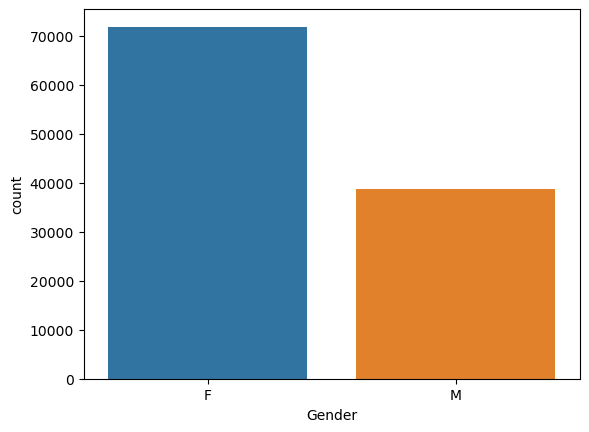

In [162]:
sns.countplot('Gender',data=data)

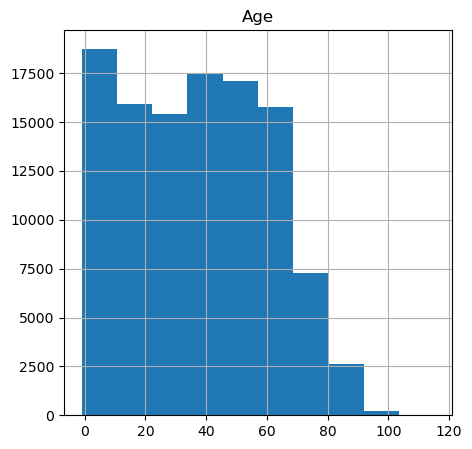

In [163]:
# histogram for each feature
data.hist(column='Age',bins=10,figsize=(5,5))
plt.show()

<AxesSubplot:xlabel='Age'>

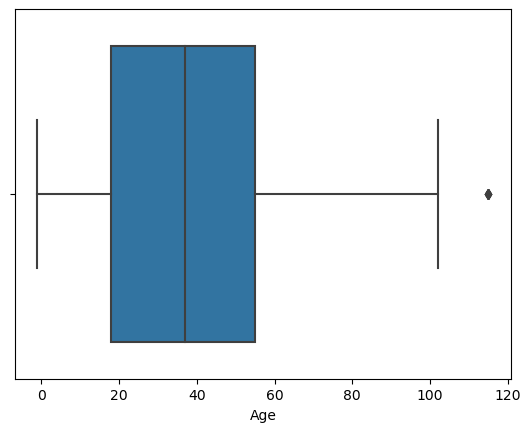

In [164]:
sns.boxplot(x='Age',data=data)
plt.subplot()

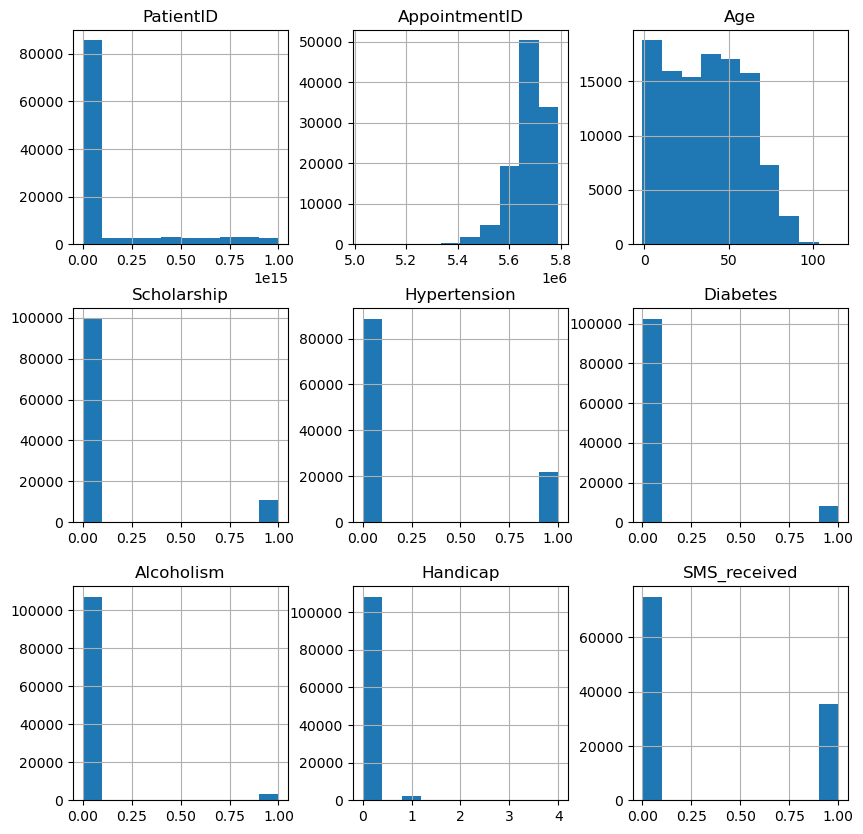

In [165]:
# histogram for each feature
data.hist(bins=10,figsize=(10,10))
plt.show() 

## 4.  Count the frequency of negative Age feature observations, and remove them

In [166]:
# count the frequency of nagative age feature observation
print("Negative Age values:", (data["Age"] < 0).sum())
# Filter age who under zero and delete. 
data[(data.Age <0)]

Negative Age values: 1


,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
99832,4.660000e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1.0,ROMÃO,0,0,0,0,0,0,No


In [167]:
# remove negative age 
data = data[data["Age"] >= 0]

In [168]:
# data=data.drop([99832],axis=0,inplace=False)
# 这块代码有风险，在于如果它不是在99832这行，那么就没办法drop，我推荐用上面的的方式


## 5. The values within AwaitingTime are negative, transform them into positive values

In [169]:
# Convert the ScheduledDay and AppointmentDay columns to datetime
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])

# Calculate the waiting time and convert it to days
data['AwaitingTime'] = (data['ScheduledDay'] - data['AppointmentDay']).dt.days

# transform them into positive values
data["AwaitingTime"] = abs(data["AwaitingTime"])

## 6. ML algorithm requires the variables to be coded into its equivalent integer codes. Encode the string categorical values into an integer code

In [170]:
# check the information of dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110523 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientID       110523 non-null  float64            
 1   AppointmentID   110523 non-null  int64              
 2   Gender          110523 non-null  object             
 3   ScheduledDay    110523 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110523 non-null  datetime64[ns, UTC]
 5   Age             110523 non-null  float64            
 6   Neighbourhood   110523 non-null  object             
 7   Scholarship     110523 non-null  int64              
 8   Hypertension    110523 non-null  int64              
 9   Diabetes        110523 non-null  int64              
 10  Alcoholism      110523 non-null  int64              
 11  Handicap        110523 non-null  int64              
 12  SMS_received    110523 non-null  int64              
 13  No-show       

In [171]:
le = LabelEncoder()
#data["PatientID"] = le.fit_transform(data["PatientID"])
data["Gender"] = le.fit_transform(data["Gender"])
#data["ScheduledDay"] = le.fit_transform(data["ScheduledDay"])
#data["AppointmentDay"] = le.fit_transform(data["AppointmentDay"])
#data["Age"] = le.fit_transform(data["Age"])
data["Neighbourhood"] =  le.fit_transform(data["Neighbourhood"])
data["No-show"] = le.fit_transform(data["No-show"])
# check all data type into an integer code
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110523 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientID       110523 non-null  float64            
 1   AppointmentID   110523 non-null  int64              
 2   Gender          110523 non-null  int64              
 3   ScheduledDay    110523 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110523 non-null  datetime64[ns, UTC]
 5   Age             110523 non-null  float64            
 6   Neighbourhood   110523 non-null  int64              
 7   Scholarship     110523 non-null  int64              
 8   Hypertension    110523 non-null  int64              
 9   Diabetes        110523 non-null  int64              
 10  Alcoholism      110523 non-null  int64              
 11  Handicap        110523 non-null  int64              
 12  SMS_received    110523 non-null  int64              
 13  No-show       

## 7. Separate the date features into date components

In [172]:
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])
data['ScheduledDay_year'] = data['ScheduledDay'].dt.year
data['ScheduledDay_month'] = data['ScheduledDay'].dt.month
data['ScheduledDay_day'] = data['ScheduledDay'].dt.day
data['ScheduledDay_hour'] = data['ScheduledDay'].dt.hour
data['AppointmentDay_year'] = data['AppointmentDay'].dt.year
data['AppointmentDay_month'] = data['AppointmentDay'].dt.month
data['AppointmentDay_day'] = data['AppointmentDay'].dt.day

In [173]:
# parse_dates=['ScheduledDay','AppointmentDay']

In [174]:
# data.ScheduledDay=data.ScheduledDay.str.replace('T',' ')
# data.ScheduledDay=data.ScheduledDay.str.replace('Z','')
# data.ScheduledDay[0]

In [175]:
# data.AppointmentDay=data.AppointmentDay.str.replace('T',' ')
# data.AppointmentDay=data.AppointmentDay.str.replace('Z','')
# data.AppointmentDay[0]

In [176]:
# data.ScheduledDay=pd.to_datetime(data['ScheduledDay'], format='%Y-%m-%d %H:%M:%S')
# data.AppointmentDay=pd.to_datetime(data['AppointmentDay'], format='%Y-%m-%d %H:%M:%S')
# data.ScheduledDay[0]

In [177]:
# data.ScheduledDay[42]-data.AppointmentDay[42]

In [178]:
# data.dtypes

In [179]:
# data['AwaitingTime']=data['ScheduledDay']-data['AppointmentDay']

In [180]:
# data.describe()

In [181]:
# data['AwaitingTime'] < '%0-%0-%0 %0:%0:%0'

# 6. ML algorithm requires the variables to be coded into its equivalent integer codes. Encode the string categorical values into an integer code

In [182]:
# data.dtypes

In [183]:
# data['Age'] = data['Age'].apply(np.int64)

In [184]:
# data['Gender'].replace('F', 0,inplace=True)
# data['Gender'].replace('M', 1,inplace=True)
# data['Gender'] = data['Gender'].apply(np.int64)
# data.dtypes

In [185]:
# data['No-show'].replace('No', 0,inplace=True)
# data['No-show'].replace('Yes', 1,inplace=True)
# data['No-show'] = data['No-show'].apply(np.int64)
# data.dtypes

In [186]:
# data.dtypes

## 8. ML algorithms work best when the input data are scaled to a narrow range around zero. Rescale the age feature with a normalizing (e.g., min_max normalization) or standardization (e.g., z_score standardization) function.

### (1)normalization ( min_max normalization)

In [187]:
data.Age_norm=(data.Age-data.Age.min())/(data.Age.max()-data.Age.min())

/var/folders/s1/4fm2_tw16qzdhqgqcb0ry6rm0000gn/T/ipykernel_35999/1765582337.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.Age_norm=(data.Age-data.Age.min())/(data.Age.max()-data.Age.min())


### (2)standardization (e.g., z_score standardization)

In [188]:
# Z-Score using pandas
(data.Age_norm - data.Age_norm.mean()) / data.Age_norm.std()

0         1.077935
1         0.818308
2         1.077935
3        -1.258707
4         0.818308
            ...   
110522    0.818308
110523    0.601952
110524   -0.696182
110525    0.039427
110526    0.731766
Name: Age, Length: 110523, dtype: float64

In [189]:
data.describe()

,PatientID,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,AwaitingTime,ScheduledDay_year,ScheduledDay_month,ScheduledDay_day,ScheduledDay_hour,AppointmentDay_year,AppointmentDay_month,AppointmentDay_day
count,1.105230e+05,1.105230e+05,110523.000000,110523.000000,110523.000000,110523.000000,110523.000000,110523.000000,110523.000000,110523.000000,110523.000000,110523.000000,110523.000000,110523.000000,110523.000000,110523.000000,110523.000000,110523.0,110523.000000,110523.000000
mean,1.474963e+14,5.675306e+06,0.350027,37.088832,41.736869,0.098269,0.197253,0.071867,0.030401,0.022249,0.321028,0.201940,10.184143,2015.999439,4.823883,14.252011,10.774445,2016.0,5.210074,12.499009
std,2.560964e+14,7.129585e+04,0.476980,23.110091,22.361834,0.297680,0.397927,0.258269,0.171689,0.161546,0.466874,0.401449,15.255065,0.023678,0.715792,9.345561,3.216137,0.0,0.473741,9.056217
min,3.920000e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,6.000000,2016.0,4.000000,1.000000
25%,4.170000e+12,5.640286e+06,0.000000,18.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,4.000000,6.000000,8.000000,2016.0,5.000000,5.000000
50%,3.170000e+13,5.680574e+06,0.000000,37.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2016.000000,5.000000,13.000000,10.000000,2016.0,5.000000,10.000000
75%,9.440000e+13,5.725524e+06,1.000000,55.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,15.000000,2016.000000,5.000000,22.000000,13.000000,2016.0,5.000000,19.000000
max,1.000000e+15,5.790484e+06,1.000000,115.000000,80.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,179.000000,2016.000000,12.000000,31.000000,21.000000,2016.0,6.000000,31.000000


In [190]:
# Initialize the scaler
scaler = MinMaxScaler()

# Scale the Age feature
data['Age_Norm'] = scaler.fit_transform(data[['Age']])

data.describe()

,PatientID,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,...,No-show,AwaitingTime,ScheduledDay_year,ScheduledDay_month,ScheduledDay_day,ScheduledDay_hour,AppointmentDay_year,AppointmentDay_month,AppointmentDay_day,Age_Norm
count,1.105230e+05,1.105230e+05,110523.000000,110523.000000,110523.000000,110523.000000,110523.000000,110523.000000,110523.000000,110523.000000,...,110523.000000,110523.000000,110523.000000,110523.000000,110523.000000,110523.000000,110523.0,110523.000000,110523.000000,110523.000000
mean,1.474963e+14,5.675306e+06,0.350027,37.088832,41.736869,0.098269,0.197253,0.071867,0.030401,0.022249,...,0.201940,10.184143,2015.999439,4.823883,14.252011,10.774445,2016.0,5.210074,12.499009,0.322512
std,2.560964e+14,7.129585e+04,0.476980,23.110091,22.361834,0.297680,0.397927,0.258269,0.171689,0.161546,...,0.401449,15.255065,0.023678,0.715792,9.345561,3.216137,0.0,0.473741,9.056217,0.200957
min,3.920000e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2015.000000,1.000000,1.000000,6.000000,2016.0,4.000000,1.000000,0.000000
25%,4.170000e+12,5.640286e+06,0.000000,18.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2016.000000,4.000000,6.000000,8.000000,2016.0,5.000000,5.000000,0.156522
50%,3.170000e+13,5.680574e+06,0.000000,37.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,4.000000,2016.000000,5.000000,13.000000,10.000000,2016.0,5.000000,10.000000,0.321739
75%,9.440000e+13,5.725524e+06,1.000000,55.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,15.000000,2016.000000,5.000000,22.000000,13.000000,2016.0,5.000000,19.000000,0.478261
max,1.000000e+15,5.790484e+06,1.000000,115.000000,80.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,1.000000,179.000000,2016.000000,12.000000,31.000000,21.000000,2016.0,6.000000,31.000000,1.000000


# 9 Conduct variability comparison between features using a correlation matrix & drop correlated features

In [191]:
corr_matrix = data.corr()
corr_matrix

,PatientID,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,...,No-show,AwaitingTime,ScheduledDay_year,ScheduledDay_month,ScheduledDay_day,ScheduledDay_hour,AppointmentDay_year,AppointmentDay_month,AppointmentDay_day,Age_Norm
PatientID,1.000000,0.004010,0.007895,-0.004118,0.003750,-0.002881,-0.006438,0.001602,0.010999,-0.007914,...,-0.001460,-0.001442,-0.000936,0.002368,0.003342,0.001957,NaN,0.001558,0.003249,-0.004118
AppointmentID,0.004010,1.000000,0.018512,-0.019090,0.005505,0.022613,0.012749,0.022627,0.032943,0.014105,...,-0.162609,-0.771849,0.177433,0.817789,-0.025362,-0.049320,NaN,0.489963,0.018581,-0.019090
Gender,0.007895,0.018512,1.000000,-0.106468,-0.008041,-0.114298,-0.055723,-0.032557,0.106168,0.022814,...,-0.004123,-0.028424,0.003767,0.013337,0.002800,-0.001263,NaN,-0.006043,0.000212,-0.106468
Age,-0.004118,-0.019090,-0.106468,1.000000,-0.016344,-0.092459,0.504601,0.292399,0.095814,0.078035,...,-0.060319,0.034824,-0.026778,-0.002997,-0.008944,0.014116,NaN,0.014616,-0.007151,1.000000
Neighbourhood,0.003750,0.005505,-0.008041,-0.016344,1.000000,0.006872,0.004332,0.011352,-0.000007,0.010993,...,-0.008952,-0.002032,-0.015145,0.009290,0.001247,-0.002501,NaN,0.002323,0.002087,-0.016344
Scholarship,-0.002881,0.022613,-0.114298,-0.092459,0.006872,1.000000,-0.019735,-0.024897,0.035020,-0.008588,...,0.029129,-0.030431,0.001403,0.016807,0.007506,-0.024385,NaN,-0.002606,0.002625,-0.092459
Hypertension,-0.006438,0.012749,-0.055723,0.504601,0.004332,-0.019735,1.000000,0.433083,0.087968,0.080081,...,-0.035711,-0.017230,-0.035310,0.024985,0.001065,-0.033212,NaN,0.003752,-0.007763,0.504601
Diabetes,0.001602,0.022627,-0.032557,0.292399,0.011352,-0.024897,0.433083,1.000000,0.018472,0.057529,...,-0.015185,-0.027196,-0.006723,0.025592,-0.007054,-0.014405,NaN,0.003726,-0.004223,0.292399
Alcoholism,0.010999,0.032943,0.106168,0.095814,-0.000007,0.035020,0.087968,0.018472,1.000000,0.004647,...,-0.000199,-0.038525,0.004195,0.028769,-0.004250,-0.002706,NaN,0.003910,-0.002518,0.095814
Handicap,-0.007914,0.014105,0.022814,0.078035,0.010993,-0.008588,0.080081,0.057529,0.004647,1.000000,...,-0.006079,-0.019833,-0.006199,0.014951,-0.001203,0.002676,NaN,-0.001486,-0.002326,0.078035


# B. Model Development : Naïve Bayes classifier